In [37]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Europe Sales Records.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1330 non-null   object 
 1   Country         1330 non-null   object 
 2   Item Type       1330 non-null   object 
 3   Sales Channel   1330 non-null   object 
 4   Order Priority  1330 non-null   object 
 5   Order Date      1330 non-null   object 
 6   Order ID        1330 non-null   int64  
 7   Ship Date       1330 non-null   object 
 8   Units Sold      1330 non-null   int64  
 9   Unit Price      1330 non-null   float64
 10  Unit Cost       1330 non-null   float64
 11  Total Revenue   1330 non-null   float64
 12  Total Cost      1330 non-null   float64
 13  Total Profit    1330 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 145.6+ KB


In [7]:
df['Order ID'].nunique ## No duplicate Order ID's -> Compared to number of rows in dataframe.

<bound method IndexOpsMixin.nunique of 0       478051030
1       919133651
2       987410676
3       672330081
4       579463422
          ...    
1325    634033286
1326    559183347
1327    781416594
1328    713357150
1329    906794202
Name: Order ID, Length: 1330, dtype: int64>

In [15]:
df['Region'].unique() ## No outlier in the Region data.

array(['Europe'], dtype=object)

In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Calculate the difference between 'Ship Date' and 'Order Date'
delivery_times = df['Ship Date'] - df['Order Date']

# Find the maximum range (maximum delivery time)
max_delivery_time = delivery_times.max()
min_delivery_time = delivery_times.min()

print("Longest processing time:", max_delivery_time)
print("Quickest processing time:", min_delivery_time) # Maybe digital delivery.

same_day_shipment = df[df['Ship Date'].dt.date == df['Order Date'].dt.date]

print(same_day_shipment) # Looks like many different categories of items ship on the same day, kudos to logistics.

Longest processing time: 50 days 00:00:00
Quickest processing time: 0 days 00:00:00
      Region         Country      Item Type Sales Channel Order Priority  \
21    Europe   Liechtenstein      Cosmetics        Online              L   
48    Europe     Switzerland      Cosmetics        Online              C   
57    Europe           Malta  Personal Care       Offline              M   
239   Europe      San Marino      Beverages       Offline              L   
242   Europe      San Marino      Household       Offline              H   
356   Europe      San Marino         Cereal        Online              H   
474   Europe     Switzerland           Meat       Offline              L   
549   Europe         Germany     Vegetables       Offline              C   
627   Europe  Czech Republic         Cereal       Offline              C   
645   Europe         Denmark      Baby Food        Online              L   
669   Europe      Montenegro  Personal Care       Offline              C   
771 

In [35]:
df.sort_values(by = ['Units Sold'], ascending=False).drop_duplicates('Item Type').head() # What top 5 Item Types sold the most units?

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
413,Europe,United Kingdom,Personal Care,Offline,H,2013-12-23,387098824,2014-01-04,9999,81.73,56.67,817218.27,566643.33,250574.94
1040,Europe,Portugal,Office Supplies,Offline,C,2012-02-17,775849616,2012-03-05,9997,651.21,524.96,6510146.37,5248025.12,1262121.25
527,Europe,Ireland,Clothes,Online,C,2012-10-02,261187350,2012-10-03,9996,109.28,35.84,1092362.88,358256.64,734106.24
242,Europe,San Marino,Household,Offline,H,2015-12-09,821131742,2015-12-09,9985,668.27,502.54,6672675.95,5017861.90,1654814.05
38,Europe,Hungary,Baby Food,Online,M,2011-01-25,128686225,2011-03-13,9968,255.28,159.42,2544631.04,1589098.56,955532.48


In [38]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 

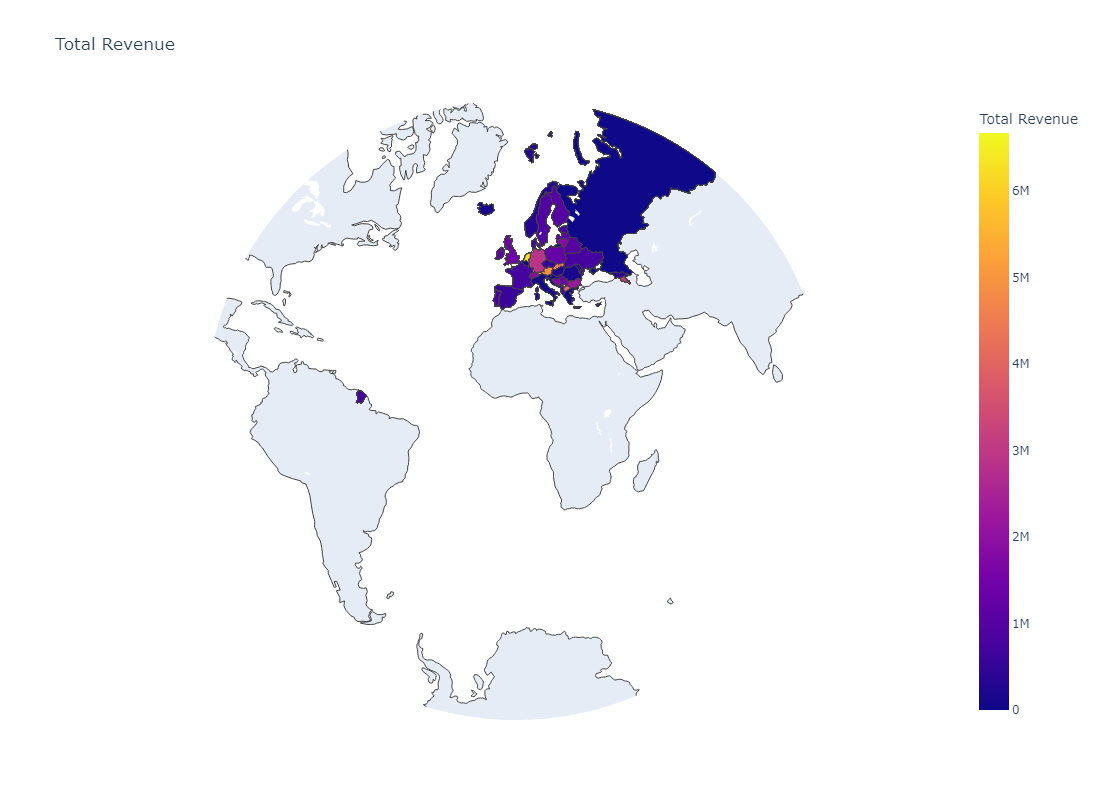

In [52]:
data = dict(
    type = 'choropleth',
    locations = df['Country'],
    locationmode = 'country names',
    z = df['Total Revenue'],
    text = df['Country'],
    colorbar = {'title':'Total Revenue'})

layout = dict(
    width = 800,
    height = 800,
    title = 'Total Revenue',
    geo = dict(
        showframe = False,
        projection = {'type':'stereographic'}))

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [44]:
# We use a map to visualize that the Netherlands had the highest total revenue. Let's verify this.

In [53]:
country_total_revenue = df.groupby('Country')['Total Revenue'].sum()

country_with_highest_revenue = country_total_revenue.idxmax()
highest_revenue = country_total_revenue.max()

print("Country with the highest total revenue:", country_with_highest_revenue)
print("Total revenue for the highest country:", highest_revenue)

# Probably not all countries are listed in the plot.ly database in the option 'locationmode' or maybe they differ in spelling. Let's rely on the data we have instead of the third party library plot.ly.

Country with the highest total revenue: Kosovo
Total revenue for the highest country: 53833142.79
